# Import Libraries

In [12]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Cleaned Dataset

In [13]:
df = pd.read_csv(r"E:\Projects\NovaTel\Data\cleaned_customer_data.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Encode Categorical Columns

In [14]:
from sklearn.preprocessing import LabelEncoder

def object_to_int(series):
    if series.dtype == 'object':
        return LabelEncoder().fit_transform(series)
    return series

df = df.apply(object_to_int)
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Train-Test Split

In [15]:
X = df.drop(columns=['Churn'])
y = df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state = 40, stratify=y
)


### Standardize Numerical Columns

In [16]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Logistic Regression Model

In [17]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)

y_pred_lr = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))


Accuracy: 0.8090047393364929
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.80      2110

[[1381  168]
 [ 235  326]]


### Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state=40)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))


Accuracy: 0.7843601895734598
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1549
           1       0.63      0.46      0.53       561

    accuracy                           0.78      2110
   macro avg       0.73      0.68      0.69      2110
weighted avg       0.77      0.78      0.77      2110

[[1399  150]
 [ 305  256]]


### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=40)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.8080568720379147
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.67      0.54      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110

[[1402  147]
 [ 258  303]]


### XGBoost

In [21]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=40
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))


Accuracy: 0.7985781990521327
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110

[[1379  170]
 [ 255  306]]


### SVM

In [23]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))


Accuracy: 0.8075829383886256
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.69      0.50      0.58       561

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110

[[1423  126]
 [ 280  281]]


### KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))


Accuracy: 0.7767772511848341
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1549
           1       0.59      0.54      0.56       561

    accuracy                           0.78      2110
   macro avg       0.71      0.70      0.71      2110
weighted avg       0.77      0.78      0.77      2110

[[1334  215]
 [ 256  305]]


### Compare All Models

In [25]:
models = {
    "Logistic Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "SVM": y_pred_svm,
    "KNN": y_pred_knn
}

for name, pred in models.items():
    print(f"{name} Accuracy: {accuracy_score(y_test, pred):.4f}")


Logistic Regression Accuracy: 0.8090
Decision Tree Accuracy: 0.7844
Random Forest Accuracy: 0.8081
XGBoost Accuracy: 0.7986
SVM Accuracy: 0.8076
KNN Accuracy: 0.7768


### ROC Curve of All Models on One Plot

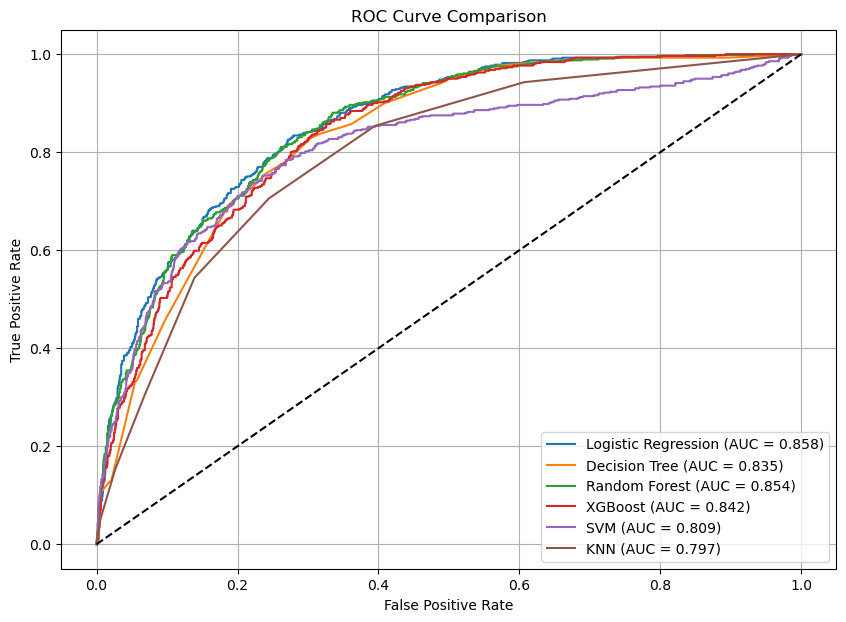

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

models_proba = {
    "Logistic Regression": log_model,
    "Decision Tree": dt,
    "Random Forest": rf,
    "XGBoost": xgb,
    "SVM": svm,  # SVM supports predict_proba=True (we enabled it earlier)
    "KNN": knn
}

plt.figure(figsize=(10,7))

for name, model in models_proba.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc_score = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.3f})")

plt.plot([0,1], [0,1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


### Confusion Matrix Heatmap

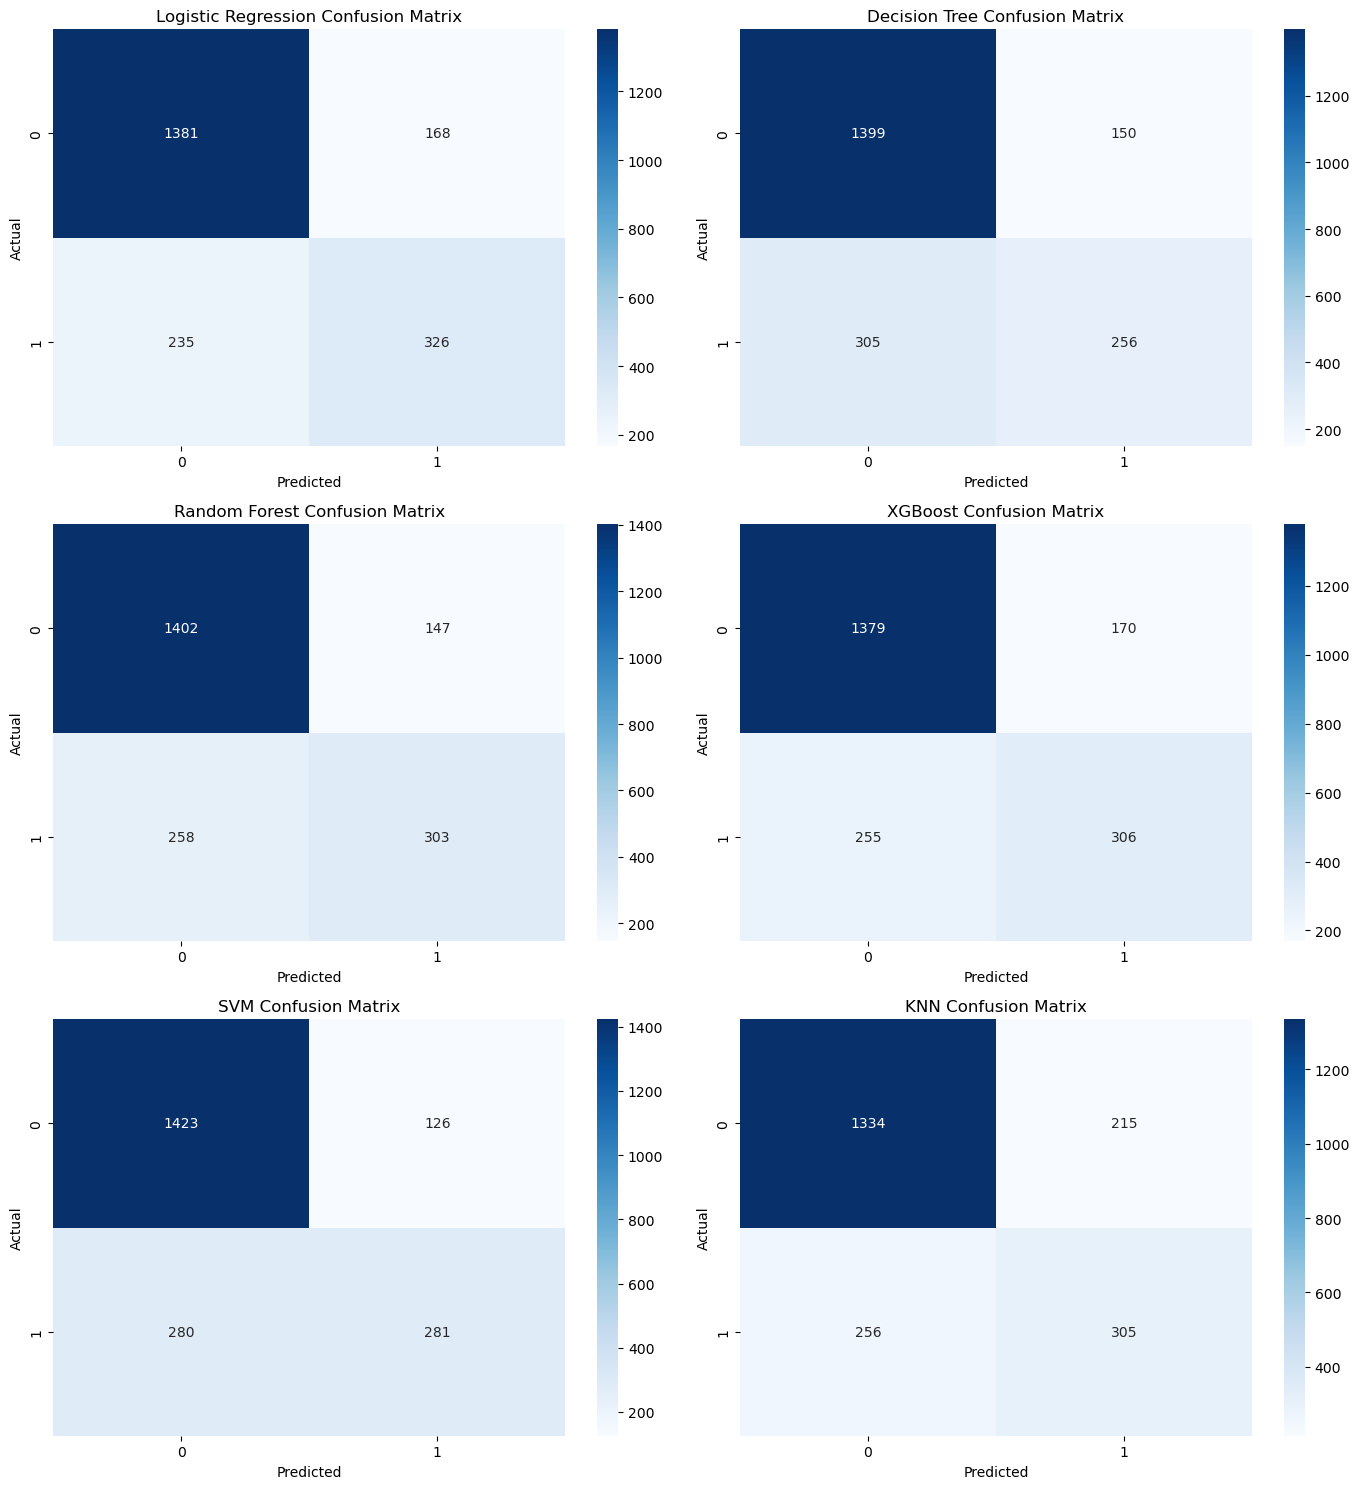

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def get_cm(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)

model_results = [
    ("Logistic Regression", y_pred_lr),
    ("Decision Tree", y_pred_dt),
    ("Random Forest", y_pred_rf),
    ("XGBoost", y_pred_xgb),
    ("SVM", y_pred_svm),
    ("KNN", y_pred_knn)
]

# 2 columns layout
rows = (len(model_results) + 1) // 2
plt.figure(figsize=(14, rows * 5))

for idx, (name, preds) in enumerate(model_results, 1):
    cm = get_cm(y_test, preds)

    plt.subplot(rows, 2, idx)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()



In [38]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_model),
        ('dt', dt),
        ('rf', rf),
        ('xgb', xgb),
        ('svm', svm),
        ('knn', knn)
    ],
    voting='soft'   # soft voting uses predicted probabilities
)

voting_clf.fit(X_train, y_train)

y_pred_voting = voting_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print(classification_report(y_test, y_pred_voting))
print(confusion_matrix(y_test, y_pred_voting))

Accuracy: 0.8090047393364929
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110

[[1399  150]
 [ 253  308]]


In [40]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_model),
        ('dt', dt),
        ('rf', rf),
        ('xgb', xgb),
        ('svm', svm),
        ('knn', knn)
    ],
    voting='soft'
)

voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

# Final Accuracy
voting_accuracy = accuracy_score(y_test, y_pred_voting)
print("Final Voting Classifier Accuracy:", voting_accuracy)

# Confusion Matrix
cm_voting = confusion_matrix(y_test, y_pred_voting)
print(cm_voting)

Final Voting Classifier Accuracy: 0.8080568720379147
[[1399  150]
 [ 255  306]]


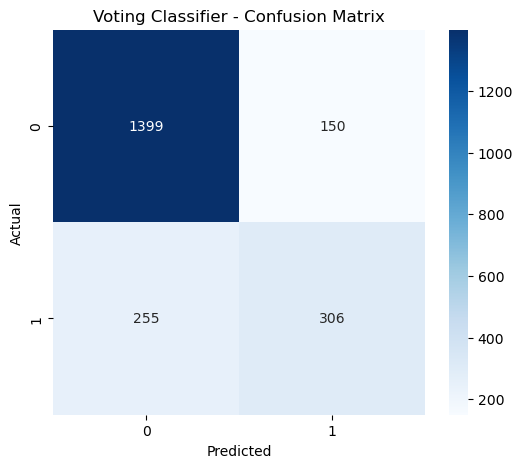

In [41]:
plt.figure(figsize=(6,5))
sns.heatmap(cm_voting, annot=True, fmt='d', cmap='Blues')
plt.title("Voting Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Conclusion
From the confusion matrix of the Voting Classifier, we can interpret the model’s performance as follows:

1.  <b>Non-Churn Customers (Actual 0)</b> <br>
Total actual non-churn customers: 1399 + 150 = 1549 <br>
Correctly predicted as non-churn (True Negative): 1399 <br>
Incorrectly predicted as churn (False Positive): 150

2. <b>Churn Customers (Actual 1)</b> <br>
Total actual churn customers: 255 + 306 = 561 <br>
Correctly predicted as churn (True Positive): 306 <br>
Incorrectly predicted as non-churn (False Negative): 255

## Summary
The model performs well with a final accuracy of ~80.8%, showing strong performance in identifying non-churn customers and moderate performance in correctly identifying churn cases.

## Business Interpretation

Customer churn significantly affects a company’s revenue and long-term stability. The model helps identify which customers are likely to churn so the company can take preventive actions. Some effective churn-reduction strategies include:

- Improving customer service and reducing service issues
- Personalizing customer engagement and communication
- Offering loyalty programs or discounts
- Addressing customer complaints proactively
- Collecting feedback from churned customers to understand the causes

By leveraging churn predictions, businesses can implement targeted retention strategies and improve overall customer satisfaction and profitability.